100%|===================| 2786/2792 [01:44<00:00]        

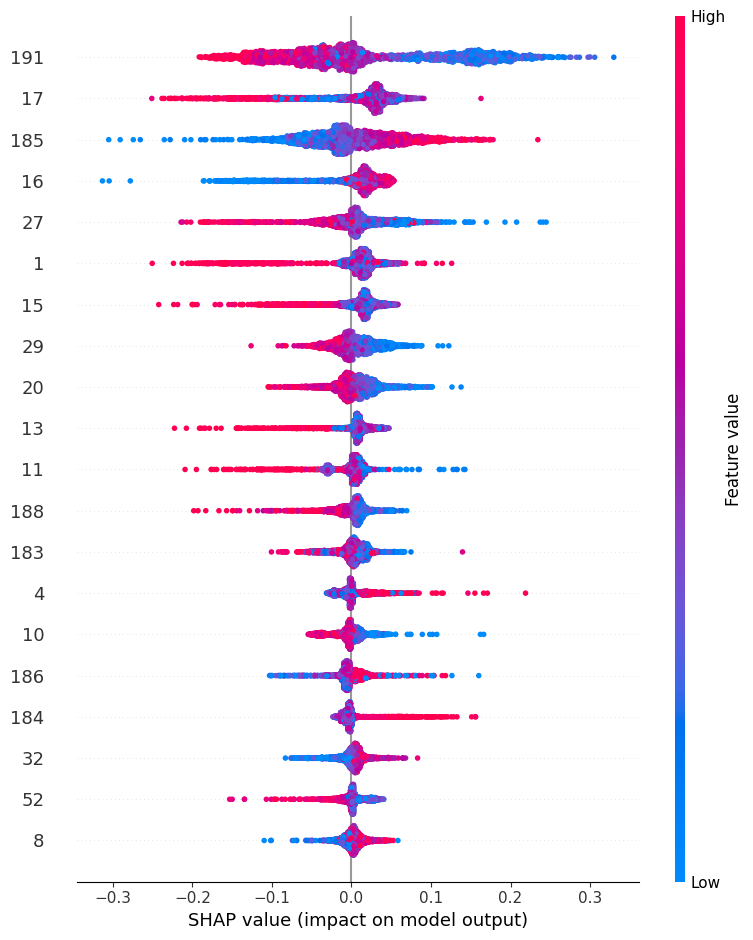

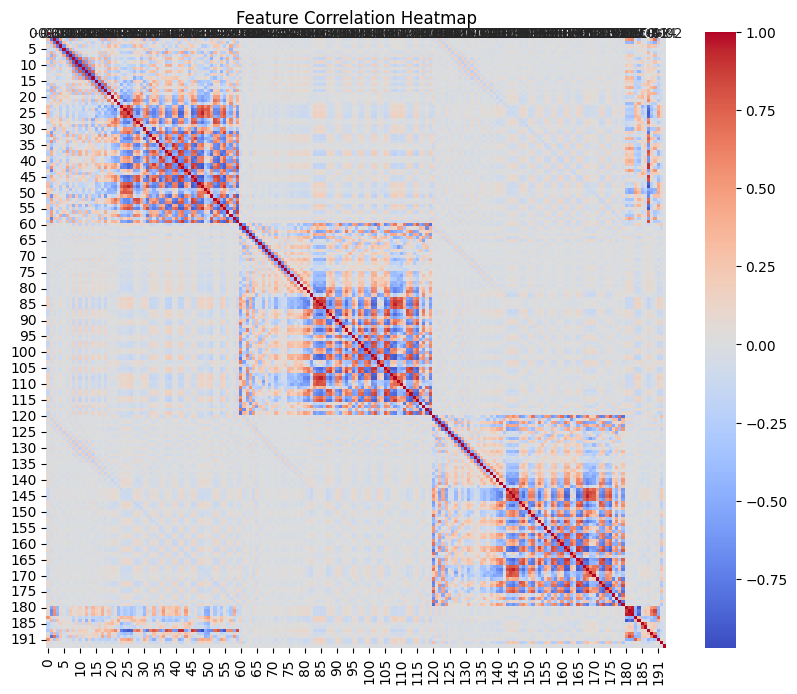

Correlation between features and target:
    Feature  Correlation
190     191    -0.349089
185     185     0.344636
15       15    -0.283964
14       14     0.249676
13       13    -0.241177
..      ...          ...
10       10     0.001450
137     137     0.001369
178     178    -0.001207
102     102    -0.000909
144     144    -0.000387

[193 rows x 2 columns]


In [2]:
import pandas as pd
import numpy as np
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('train_features.csv')

# Ensure the dataset has a target column (rename "target_column" to the actual target name)
target_column = 'label'  # Replace with the actual target column name
if target_column not in data.columns:
    raise ValueError(f"The dataset must contain a target column named '{target_column}'.")

# Split into features and target
X = data.drop(columns=[target_column, "190"])
y = data[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model for XAI demonstration
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature Importance using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Compute correlation between each feature and the target
correlations = {}
for column in X.columns:
    correlations[column] = np.corrcoef(data[column], y)[0, 1]

# Convert correlations to a DataFrame for visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

# Sort by absolute correlation value
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Print correlation values
print("Correlation between features and target:")
print(correlation_df[['Feature', 'Correlation']])
